In [1]:
import tensorflow as tf
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import kerastuner

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Extraction des images


In [3]:
# download data from Stanfords Dogs Dataset
data_dir = tf.keras.utils.get_file(
    fname='images.tar',
    origin='http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar',
    cache_subdir='datasets',
    extract=False,
    cache_dir='./')

In [4]:
basedir = os.path.abspath('./datasets')
for name_dir in os.listdir(basedir):
    if not os.path.isdir(os.path.join(basedir, name_dir)):  # Not a directory
        continue
    if 'n02' in name_dir:  # Invalid format
        new_name = name_dir.split(sep='-', maxsplit=1)[1]
        os.rename(
            os.path.join(basedir, name_dir),
            os.path.join(basedir, new_name))

# Visualisation des images


In [5]:
import os

dir_path = './datasets'
print(os.listdir(dir_path))

['Images', 'images.tar']


In [6]:
import tarfile

tar_file_path = './datasets/images.tar'
with tarfile.open(tar_file_path, 'r') as tar:
    tar.extractall('./datasets')

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='./datasets/Images',
    labels='inferred',
    seed=18)

Found 20580 files belonging to 120 classes.


In [8]:
num_classes = len(dataset.class_names)
print(f'Il y a {num_classes} classes de race de chien dans notre dataset')

Il y a 120 classes de race de chien dans notre dataset


In [9]:
list_classes = []
list_size = []

basedir = os.path.abspath('./datasets/Images')
for name_class in os.listdir(basedir):
    class_path = os.path.join(basedir, name_class)
    list_classes.append(name_class)
    list_size.append(len(os.listdir(class_path)))

df = pd.DataFrame({'classes':list_classes, 'size':list_size})

In [10]:
df.head()

,classes,size
0,n02085620-Chihuahua,152
1,n02085782-Japanese_spaniel,185
2,n02085936-Maltese_dog,252
3,n02086079-Pekinese,149
4,n02086240-Shih-Tzu,214


In [ ]:
plt.figure(figsize=(10,40))
sns.barplot(x='size', y='classes', data=df)

<AxesSubplot:xlabel='size', ylabel='classes'>

In [ ]:
class_names = dataset.class_names

plt.figure(figsize=(14, 14))
for image_list, label_list in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_list[i].numpy().astype("uint8"))
        plt.title(class_names[label_list[i]])
        plt.axis("off")

In [ ]:
image = image_list[2].numpy().astype("uint8")
label = class_names[label_list[2]]

plt.imshow(image)
plt.title(label)


In [ ]:
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [ ]:
def plot(images, data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    plt.show()

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=90)
plot(images, data_generator)

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.3)
plot(images, data_generator)

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range=0.3)
plot(images, data_generator)

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=(0.1, 0.9))
plot(images, data_generator)

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=45.0)
plot(images, data_generator)

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.5, 1.5])
plot(images, data_generator)

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(channel_shift_range=150.0)
plot(images, data_generator)

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
plot(images, data_generator)

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True)
plot(images, data_generator)

In [ ]:
batch_size = 32
img_height = 160
img_width = 160
img_shape = (img_height, img_width)
IMG_SIZE = (160, 160)
IMG_SHAPE = IMG_SIZE + (3,)

In [ ]:
no_augmentation_kwargs = dict(
    rescale=1./255,
    validation_split=0.2)

In [ ]:
train_datagen_no_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(**no_augmentation_kwargs)

train_generator_no_augmentation = train_datagen_no_augmentation.flow_from_directory(
    directory='./datasets/Images',
    target_size=img_shape,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True)

In [ ]:
validation_datagen_no_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(**no_augmentation_kwargs)

validation_generator_no_augmentation = validation_datagen_no_augmentation.flow_from_directory(
    directory='./datasets/Images',
    target_size=img_shape,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True)

## Avec Data Augmentation


In [ ]:
augmentation_kwargs = dict(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.3,
    height_shift_range=0.3,
    brightness_range=(0.1, 0.9),
    shear_range=45.0,
    zoom_range=[0.5, 1.5],
    channel_shift_range=150.0,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2)

In [ ]:
train_datagen_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_kwargs)

train_generator_augmentation = train_datagen_augmentation.flow_from_directory(
    directory='./datasets/Images',
    target_size=img_shape,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True)

In [ ]:
validation_datagen_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(**no_augmentation_kwargs)

validation_generator_augmentation = validation_datagen_augmentation.flow_from_directory(
    directory='./datasets/Images',
    target_size=img_shape,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True)

In [ ]:
os.makedirs('./results/CNN/data_augmentation/', exist_ok=True)
os.makedirs('./results/CNN/no_data_augmentation/', exist_ok=True)

# Model CNN simple


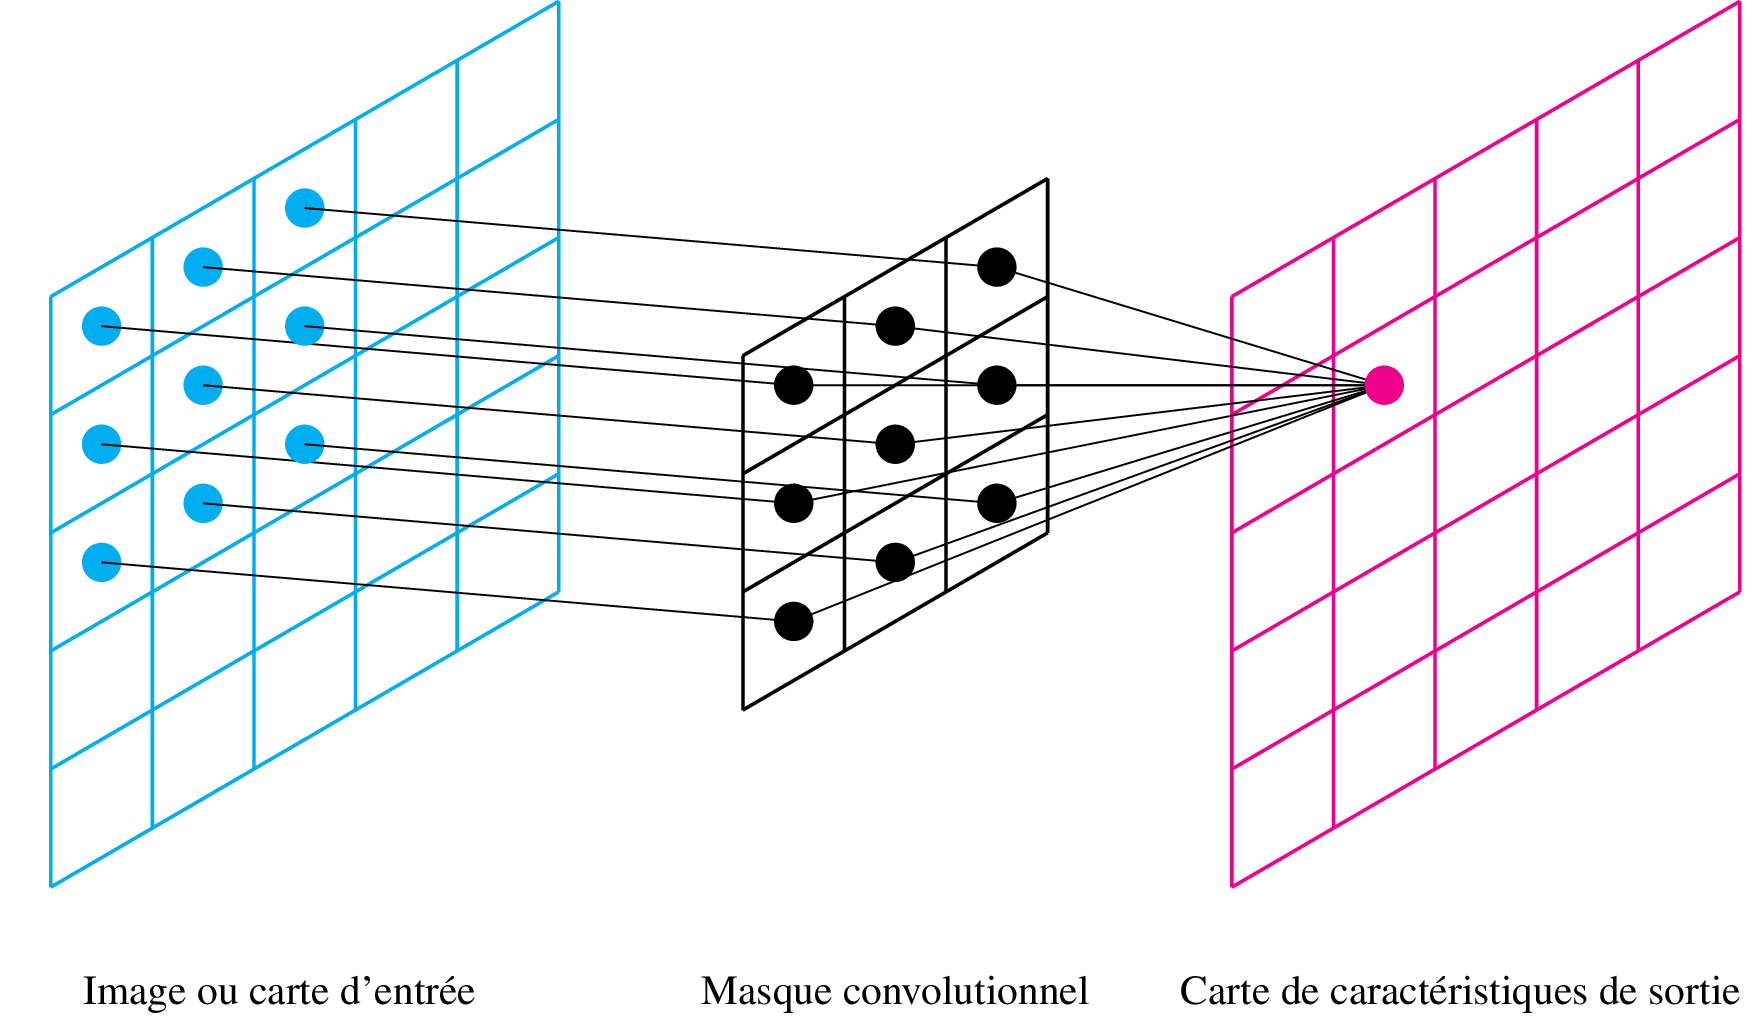

In [ ]:
model_base = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(train_generator_no_augmentation.num_classes, activation='softmax')
])

In [ ]:
model_base.build((None, 160, 160, 3)) # `input_shape` is the shape of the input data
model_base.summary()

In [ ]:
model_base.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
steps_per_epoch = train_generator_no_augmentation.samples // train_generator_no_augmentation.batch_size
validation_steps = validation_generator_no_augmentation.samples // validation_generator_no_augmentation.batch_size

if os.path.exists('./results/CNN/no_data_augmentation/history.npy'):
    history_base=np.load('./results/CNN/no_data_augmentation/history.npy',allow_pickle='TRUE').item()
else:
    history = model_base.fit(
    train_generator_no_augmentation,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator_no_augmentation,
    validation_steps=validation_steps)
    
    history_base = history.history
    np.save('./results/CNN/no_data_augmentation/history.npy',history_base)

In [ ]:
acc = history_base['accuracy']
val_acc = history_base['val_accuracy']

loss = history_base['loss']
val_loss = history_base['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Avec Data Augmentation


In [ ]:
model_base = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(train_generator_augmentation.num_classes, activation='softmax')
])

In [ ]:
model_base.build((None, 160, 160, 3)) # `input_shape` is the shape of the input data
model_base.summary()

In [ ]:
model_base.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
steps_per_epoch = train_generator_augmentation.samples // train_generator_augmentation.batch_size
validation_steps = validation_generator_augmentation.samples // validation_generator_augmentation.batch_size

if os.path.exists('./results/CNN/data_augmentation/history.npy'):
    history_base=np.load('./results/CNN/data_augmentation/history.npy',allow_pickle='TRUE').item()
else:
    history = model_base.fit(
    train_generator_augmentation,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator_augmentation,
    validation_steps=validation_steps)
    
    history_base = history.history
    np.save('./results/CNN/data_augmentation/history.npy',history_base)

In [ ]:
acc = history_base['accuracy']
val_acc = history_base['val_accuracy']

loss = history_base['loss']
val_loss = history_base['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Ce graphique est très différent du précédent. Le scores sur le jeu d'entraînement et de validation sont similaires et augmente avec le temps. Donc le modèle s'améliore avec les epochs et est capable de généraliser. En revanche les prédictions sont peu précises car seulement 2 % des prédictions sont correctes.

Pour conclure la Data Augmentation permet d'éviter le problème de surapprentissage. Cependant on constate que notre modèle n'a pas de bonnes performances. Il est possible que 20 000 images n'est pas suffisant pour obtenir un bon score. On va donc d'intéresser à une approche de transfer learning.

# Transfer learning 


Dans cette partie on va utiliser des modèles pré-entraînés qui vont être utilisé pour faire comme du preprocessing de nos images. On va tester 2 modèles :


* ResNet50V2
* VGG16

In [ ]:
IMG_SIZE = (160, 160)
IMG_SHAPE = IMG_SIZE + (3,)
base_learning_rate = 0.001
initial_epochs = 10
batch_size = 32

In [ ]:
def makeGenerator(preprocessing_function):
    
    no_augmentation_kwargs = dict(
        validation_split=0.2)
    
    augmentation_kwargs = dict(
        rotation_range=90,
        width_shift_range=0.3,
        height_shift_range=0.3,
        brightness_range=(0.1, 0.9),
        shear_range=45.0,
        zoom_range=[0.5, 1.5],
        channel_shift_range=150.0,
        horizontal_flip=True,
        vertical_flip=True,
        validation_split=0.2)

    train_datagen_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_kwargs, preprocessing_function=preprocessing_function)

    train_generator_augmentation = train_datagen_augmentation.flow_from_directory(
        directory='./datasets/Images',
        target_size=IMG_SIZE,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True)

    validation_datagen_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(**no_augmentation_kwargs, preprocessing_function=preprocessing_function)

    validation_generator_augmentation = validation_datagen_augmentation.flow_from_directory(
        directory='./datasets/Images',
        target_size=IMG_SIZE,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False)
    
    return train_generator_augmentation, validation_generator_augmentation

In [ ]:
def makeTFmodel(tf_model):
       
    model_kwargs = dict(
        include_top=False,
        weights='imagenet',
        input_tensor=None,
        input_shape=IMG_SHAPE,
        pooling=None,
        classes=1000)
    
    base_model = tf_model(**model_kwargs)
    base_model.trainable = False
    base_model.summary()
    
    global_avg_layer = tf.keras.layers.GlobalAveragePooling2D()
    prediction_layer = tf.keras.layers.Dense(120, activation='softmax')
    
    inputs = tf.keras.Input(IMG_SHAPE)
    x = base_model(inputs, training=False)
    x = global_avg_layer(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
    
    return model

In [ ]:
def evaluateTFmodel(model, train_gen, validation_gen, results_path):
    
    os.makedirs(results_path, exist_ok=True)
   
    steps_per_epoch = train_gen.samples // train_gen.batch_size
    validation_steps = validation_gen.samples // validation_gen.batch_size

    if os.path.exists(results_path + 'history.npy'):
        history_dict = np.load(results_path + 'history.npy',allow_pickle='TRUE').item()
    else:
        history = model.fit(
        train_gen,
        epochs=10,
        steps_per_epoch=steps_per_epoch,
        validation_data=validation_gen,
        validation_steps=validation_steps)

        history_dict = history.history
        np.save(results_path + 'history.npy',history_dict)
        
    return history_dict

## ResNet50V2

In [ ]:
train_gen, validation_gen = makeGenerator(tf.keras.applications.resnet_v2.preprocess_input)

In [ ]:
model_ResNet50V2 = makeTFmodel(tf.keras.applications.ResNet50V2)

In [ ]:
history_ResNet50V2 = evaluateTFmodel(model_ResNet50V2, train_gen, validation_gen, './results/TF/ResNet50V2/')

## VGG16

In [ ]:
train_gen, validation_gen = makeGenerator(tf.keras.applications.vgg16.preprocess_input)

In [ ]:
model_VGG16 = makeTFmodel(tf.keras.applications.VGG16)

In [ ]:
history_VGG16 = evaluateTFmodel(model_VGG16, train_gen, validation_gen, './results/TF/VGG16/')

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_ResNet50V2['val_accuracy'], label='Validation ResNet50V2')
plt.plot(history_VGG16['val_accuracy'], label='Validation VGG16')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_ResNet50V2['val_loss'], label='Validation ResNet50V2')
plt.plot(history_VGG16['val_loss'], label='Validation VGG16')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Validation Loss')
plt.xlabel('epoch')
plt.show()